In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

In [2]:
print(T_c)

2.269185314213022


In [8]:
results = Results(varying_param="max_steps", range= [646, 696, 746, 846, 996, 1346, 1746, 2300])
params = ModelParameters(chi = 18, T_range=(2.26, T_c+0.0003), step=0.0003, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=646: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=696: 100%|██████████| 32/32 [00:50<00:00,  1.59s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=746: 100%|██████████| 32/32 [00:54<00:00,  1.70s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=846: 100%|██████████| 32/32 [01:01<00:00,  1.93s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=996: 100%|██████████| 32/32 [01:12<00:00,  2.28s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=1346: 100%|██████████| 32/32 [01:37<00:00,  3.05s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=1746: 100%|██████████| 32/32 [02:06<00:00,  3.97s/it]


Saving data in folder: '01-05 15:46'
Done 



max_steps=2300: 100%|██████████| 32/32 [02:49<00:00,  5.31s/it]

Saving data in folder: '01-05 15:46'
Done 



In [9]:
# Make dir for saving the plots
dir = "01-05 15:46"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

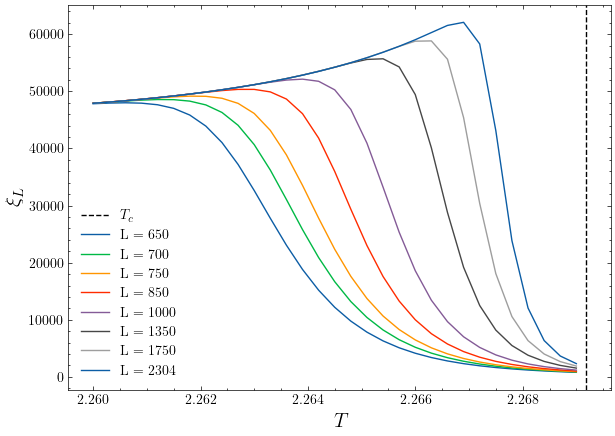

In [10]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for size in [646, 696, 746, 846, 996, 1346, 1746, 2300]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

For $\chi = 18$ and stepsize $= 0.0003$.

In [13]:
sizes = [646, 696, 746, 846, 996, 1346, 1746, 2300]
T_stars = []
for L in sizes:
    data = read("01-05 15:46", f"max_steps{L}")
    corrs = compute(Prop.xi, data)
    i_max = corrs.index(max(corrs))
    T_stars.append(data["temperatures"][i_max])

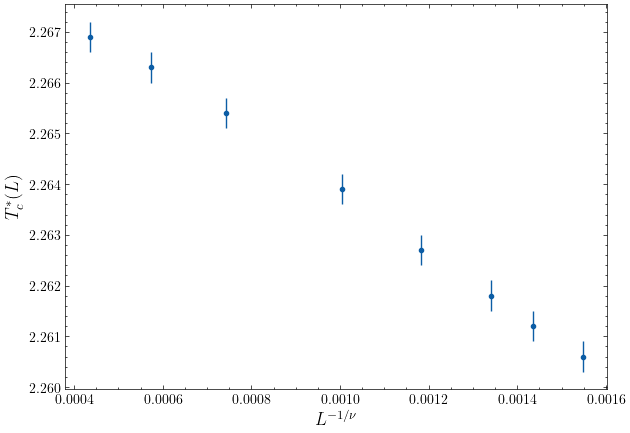

In [38]:
inv_sizes = [1/size for size in sizes]
plt.figure(figsize=(7, 5))
plt.errorbar(inv_sizes, T_stars, yerr=[0.0003 for _ in range(len(T_stars))], fmt="o", markersize=3)
plt.xlabel(r"$L^{-1/\nu}$", fontsize=13)
plt.ylabel(r"$T_c^*(L)$", fontsize=13)
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 0.73281247
    reduced chi-square = 0.12213541
    Akaike info crit   = -15.1224559
    Bayesian info crit = -14.9635728
    R-squared          = -18173.9125
[[Variables]]
    T:  2.26958210 +/- 1.0557e-04 (0.00%) (init = 0.5)
    a:  5.79256407 +/- 0.09572120 (1.65%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(T, a) = +0.9363


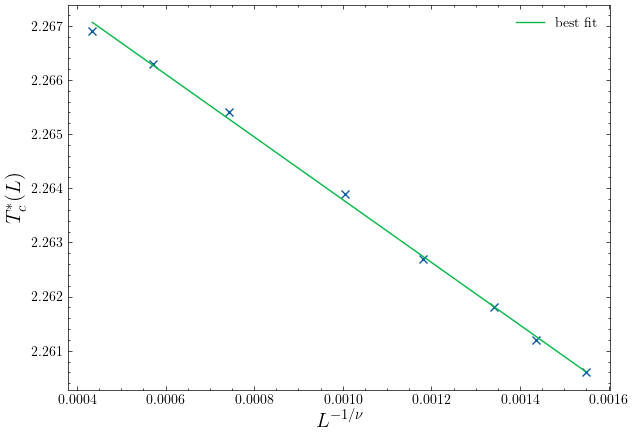

In [30]:
model = Model(lambda x, T, a: T - a*x)

x, y = inv_sizes, T_stars

params = model.make_params(a=0.5, T=0.5)
result = model.fit(y, params, x=x, weights=1/0.0003)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.errorbar(x, y, yerr=[0.0003 for _ in range(len(T_stars))], fmt="o", markersize=3)
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$L^{-1/\nu}$", fontsize=15)
plt.ylabel(r"$T_c^*(L)$", fontsize=15)
plt.legend()
plt.show()

In [31]:
print(f"Obtained T_c: {result.params['T'].value} +/- {result.params['T'].stderr}")
print(f"exact T_c: {T_c}")

Obtained T_c: 2.2695820991600404 +/- 0.00010557455018918032
exact T_c: 2.269185314213022
